In [1]:
# Setting working directory and suppressing warnings

import os
os.chdir('/home/allomorph/Documents')
import warnings
warnings.filterwarnings('ignore')

### What are we doing?


#### An overview of a few tasks to begin with :

#### Intent Analysis of the tweets using Multiclass Text Classification. The classes could be Opinion, Anecdote, Experience, Marketing,  Query, Humour, and so on. 

#### NER to see who the most frequently referenced people or organizations with respect to this hashtag are. 

#### After the NEs have been extracted, we can do a further Sentiment and Opinion Mining on tweets that reference these NEs to see what the average twitter user referencing these NEs feels about them and to see what contribution they have to the movement.


I have written a Python script that crawled Twitter and **scraped 1,69,199 tweets** : this dataset potentially consists of all the tweets that contain **#MeToo**. I have filtered retweets and images from getting scraped at the API level. Our raw data consists mostly of text and a little noise in the form of links, hexcodes, unicode characters and special characters that we can easily denoise using simple string processing in Python. Seen below is the script : 

In [2]:
# Importing libaries

import tweepy
import csv

# Adding Twitter credentials
# You can obtain your Twitter credentials to call the Tweepy API by applying for a Twitter developer account.
# It takes a few days for Twitter to approve.
# Add your Twitter credentials below as strings

consumer_key = 'asdf'
consumer_secret = 'asdf'
access_token = 'asdf'
access_token_secret = 'asdf'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


# We are going to scrape #MeToo

csvfile = open('metoo.csv','a')
csvWriter = csv.writer(csvfile)

# Since Tweets are case insensitive, we this will scrape lower, upper and title case

# UNCOMMENT THE LINES BELOW WHEN YOU WANT TO RUN  

# for tweet in tweepy.Cursor(api.search,q="#metoo -filter:retweets",tweet_mode='extended',count=500000,lang="en").items():
#     if "media" not in tweet.entities:
#         print(tweet.full_text)
#         csvWriter.writerow([tweet.full_text.encode('utf-8')])


In [3]:
# Loading the dataset

with open('metoo.csv', 'rb') as infile: 
    data = infile.read().decode('utf-8') + '\n' # add trailing new line character

I am going to extract all the handles from the text, as they will aid in our NER. Extracting the handles can also help us plot a frequency distribution to see which handles are the most tweeted to or referenced by users tweeting with #MeToo.

In [4]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
word_tokens = tokenizer.tokenize(data)

import re
handle_pattern = re.compile('@([A-Za-z0-9_]+)')

handles = [token for token in word_tokens if handle_pattern.search(token)]

# Printing a small sample 

print(set(handles[:100]), end='')

{'@USATODAY', '@shrmnextchat', '@NoyonSENSE', '@allisonwestesq', '@BJP4India', '@Nidhi', '@GOP', '@YouTube', '@GNANASEKARDS1', '@jessetorgerson', '@morningmika', '@ValerieJarrett', '@Heidieitkamp', '@dinamalarweb', '@TheRickyDavila', '@WSJ', '@MrsGandhi', '@RealJamesWoods', '@Nuri_ibrahim', '@chetan_bhagat', '@FuhSePhantom', '@PinkyD124', '@tavleen_singh', '@Samanthaprabhu2', '@mrsfunnybones', '@ndtv', '@INCIndia', '@StephMillerShow', '@DNC', '@suhelseth', '@sardesairajdeep', '@arnabgooswami', '@AmitShah', '@MailOnline', '@RNC', '@narendramodi', '@SushmaSwaraj', '@CBS', '@FLOTUS', '@magali_c', '@obyezeks', '@SwatiJaiHind', '@awryaditi', '@Tanushree_says', '@shreyaspai7', '@weeny', '@Chinmayi', '@BDUTT', '@SenatorCollins', '@KarenMonahan01', '@Alyssa_Milano', '@nidhi', '@amarakhbaranth1', '@Shaline2ee', '@suitcaseindian', '@bells110', '@kevincramer', '@mjakbar', '@kaneezsurka', '@Shehla_Rashid', '@vivekagnihotri', '@nassnigeria', '@JenDaudlin', '@republic', '@CFJCT', '@me_sourish', '@tr

### Frequency Plot of Twitter Handles:

Let us take a look at what kind of a frequency distribution the handles fall into and which are the most active handles in this movement. 

In [5]:
print("There are {} unique handles found in our dataset".format(len(set(handles))))

There are 45046 unique handles found in our dataset


Here, I am creating a dictionary object that contains each handle and the frequency of its presence in the text body

In [10]:
from collections import defaultdict

freqdict = defaultdict(int)

for handle in handles:
    freqdict[handle] += 1

# Reverse sorting the dictionary and printing the top 100, or the most frequently occuring handles in the text body
# along with their corresponding frequency

sorted_handles = sorted(freqdict.items(), key=lambda x: (-x[1], x[0]))
print(sorted_handles[:100],end='')

[('@SenatorCollins', 5676), ('@realDonaldTrump', 3906), ('@Alyssa_Milano', 3551), ('@JeffFlake', 2187), ('@lisamurkowski', 1922), ('@GOP', 1468), ('@YouTube', 1421), ('@CNN', 1407), ('@SenFeinstein', 1163), ('@FoxNews', 1039), ('@LindseyGrahamSC', 921), ('@Sen_JoeManchin', 891), ('@MSNBC', 809), ('@senatemajldr', 800), ('@MichaelAvenatti', 759), ('@FBI', 754), ('@SenateGOP', 739), ('@ChuckGrassley', 736), ('@POTUS', 692), ('@nytimes', 685), ('@SenSchumer', 668), ('@KamalaHarris', 642), ('@HillaryClinton', 613), ('@KellyannePolls', 606), ('@womensmarch', 604), ('@Nidhi', 568), ('@Chinmayi', 556), ('@thehill', 555), ('@TheDemocrats', 550), ('@DNC', 526), ('@washingtonpost', 526), ('@mjakbar', 491), ('@BillClinton', 486), ('@SenateDems', 478), ('@DonaldJTrumpJr', 456), ('@keithellison', 455), ('@ABC', 450), ('@TheRestlessQuil', 446), ('@SenatorHeitkamp', 445), ('@BDUTT', 433), ('@atensnut', 433), ('@BenSasse', 418), ('@CoryBooker', 416), ('@NBCNews', 410), ('@republic', 404), ('@TaranaBur

As we can see from the above Frequency Dictionary, the top handles have a high relative frequency of occurrence, whereas as we go lower, the frequencies become closer and more comparable. The curve will potentially have a right skewness. Let us plot the top 50 handles and their frequencies to see what the visualization looks like.

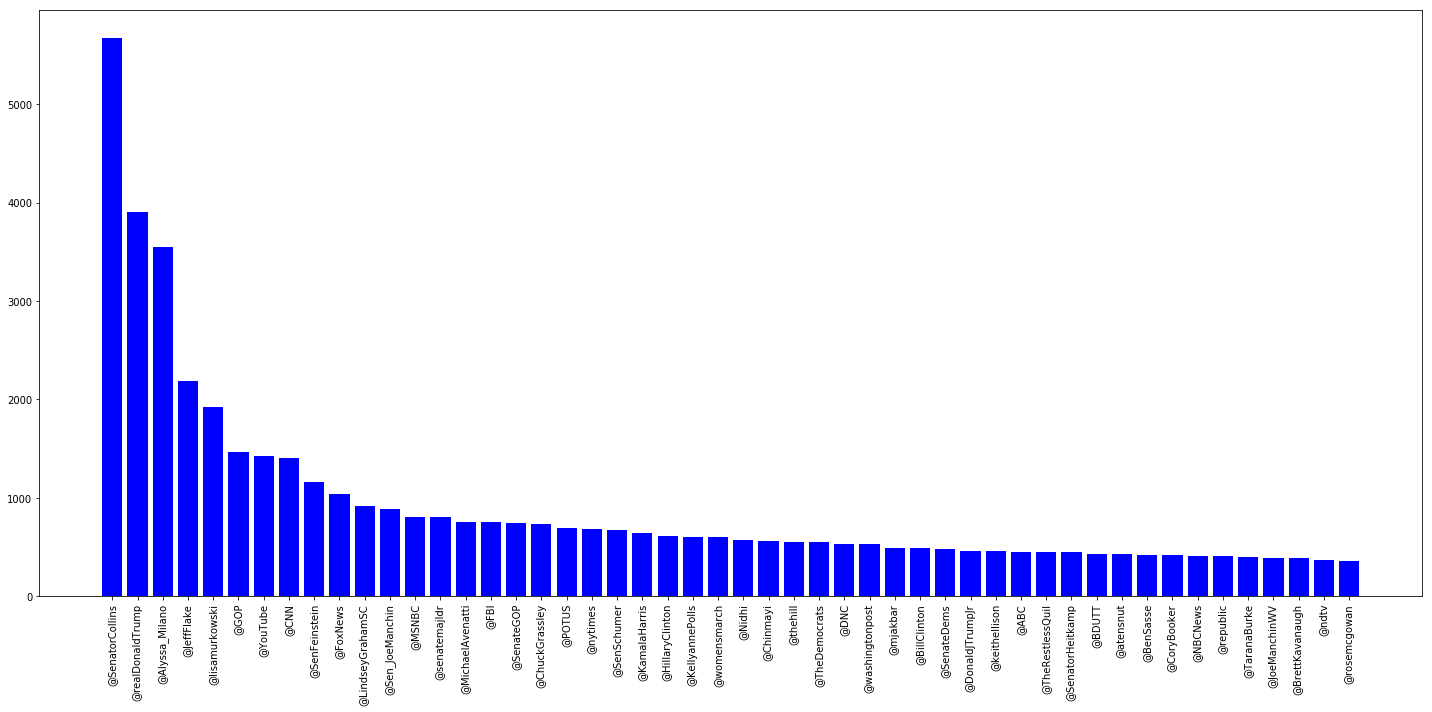

In [24]:
import numpy as np
import matplotlib.pyplot as plt

top50 = sorted_handles[:50]

handle = []
frequency = []

for i in range(len(top50)):
    handle.append(top50[i][0])
    frequency.append(top50[i][1])

indices = np.arange(len(top50))
plt.figure(figsize=(20,10))
plt.bar(indices, frequency, color='b')
plt.xticks(indices, handle, rotation='vertical')
plt.tight_layout()
plt.show()

### Denoising, Data Cleaning and Preprocessing

I am going to denoise the text by removing links, hexcodes, unicode objects like emojis and so on.